#### Carregando a base de dados

In [2]:
import pickle

with open(r'../_Material/Bases de dados/Bases pre-processadas/base_census.pkl', mode = 'rb') as arquivo:
    x_previsores, y_classes, x_teste, y_teste = pickle.load( arquivo )

In [4]:
x_previsores.shape, y_classes.shape

((27676, 108), (27676,))

In [5]:
x_teste.shape, y_teste.shape

((4885, 108), (4885,))

#### Aplicação do aprendizado

In [6]:
from sklearn.svm import SVC

modelo = SVC(kernel='linear', random_state = 1, C=1.0)  # O parâmetro C indica qual a tolerância em relação aos erros.
modelo.fit(x_previsores, y_classes)


SVC(kernel='linear', random_state=1)

In [9]:
previsao = modelo.predict(x_teste)

In [7]:
from sklearn.metrics import accuracy_score

In [10]:
print(f'Precisão do modelo: {accuracy_score( y_teste, previsao)*100:.2f}%')

Precisão do modelo: 85.08%


#### Visualizando resultados do modelo

In [11]:
from yellowbrick.classifier import ConfusionMatrix
from matplotlib.pyplot import xlabel, ylabel
from sklearn.metrics import classification_report

#### Explicação do resultado

Nesta matriz, os valores são provenientes do cruzamento entre as previsões e os valores reais do conjunto de dados. Sendo assim, pode-se chegar à seguinte conclusão:


**Para a classe "<=50K", 3.459 previsões estão corretas e 234 estão incorretas.**

<br>

**Para a classe ">50K", 697 previsões estão corretas e 495 estão incorretas.**

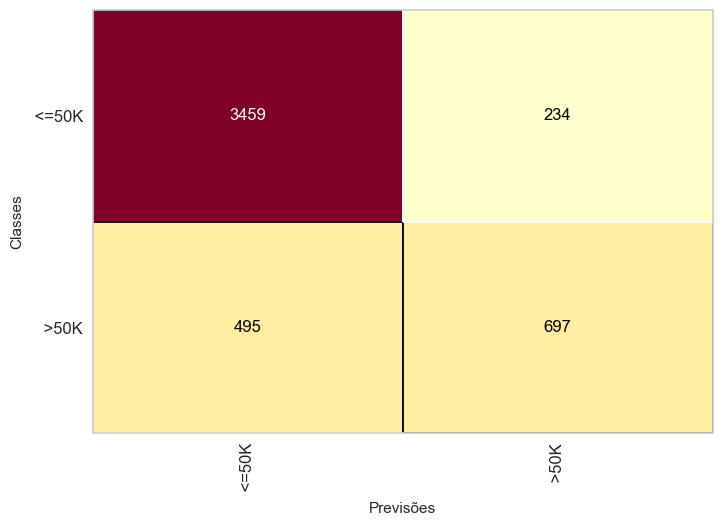

In [14]:
cm = ConfusionMatrix( modelo )
cm.fit( x_previsores, y_classes )
cm.score( x_teste, y_teste )

xlabel('Previsões');
ylabel('Classes');

#### Gerando relatório de classificação

In [16]:
print(classification_report( y_teste, previsao ))

              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.90      3693
        >50K       0.75      0.58      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.76      0.78      4885
weighted avg       0.84      0.85      0.84      4885

